In [73]:
import glob
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import keras as k

In [74]:
ckd=pd.read_csv("final.csv")
y = ckd['Class']
# no feature seleection
#new_ckd = ckd.drop(['Class'], axis=1)
#correlation 
new_ckd = ckd.drop(['Class','Age','Bp', 'Sg', 'Su','Rbc','Pcc','Ba','Sod','Pot','Wbcc','Pcv','Rbcc','Htn','Dm','Cad','Appet','pe','Ane'], axis=1)
#lasso 
#new_ckd = ckd.drop(['Class','Age', 'Bp', 'Pc', 'Pcc', 'Ba', 'Bu', 'Pot', 'Wbcc', 'Rbcc', 'Cad','Ane'], axis=1) 
#wrapper
#new_ckd = ckd.drop(['Class','Age', 'Bp', 'Su', 'Pc', 'Pcc', 'Ba', 'Bgr', 'Bu', 'Sc', 'Sod', 'Pot', 'Hemo', 'Pcv', 'Wbcc', 'Rbcc', 'Htn', 'Cad', 'Appet', 'pe', 'Ane'], axis=1)


In [75]:
#Feature scaling
x_scaler=MinMaxScaler()
x_scaler.fit(new_ckd)
column_names=new_ckd.columns
new_ckd[column_names]=x_scaler.transform(new_ckd)

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_ckd, y, test_size=0.5, random_state=0)




In [77]:
#Build the model
model=Sequential()
model.add(Dense(256, input_dim=len(new_ckd.columns), kernel_initializer=k.initializers.random_normal(seed=13), activation='relu'))
model.add(Dense(1, activation='hard_sigmoid'))
     

In [78]:
#Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [79]:
#Train the model
history=model.fit(X_train, y_train,epochs=50, batch_size=X_train.shape[0])

Epoch 1/50
1/1 [==============================] - 1s 808ms/step - loss: 0.7016 - accuracy: 0.3850
Epoch 2/50
1/1 [==============================] - 0s 8ms/step - loss: 0.6975 - accuracy: 0.4050
Epoch 3/50
1/1 [==============================] - 0s 8ms/step - loss: 0.6934 - accuracy: 0.4850
Epoch 4/50
1/1 [==============================] - 0s 0s/step - loss: 0.6895 - accuracy: 0.6050
Epoch 5/50
1/1 [==============================] - 0s 5ms/step - loss: 0.6857 - accuracy: 0.6150
Epoch 6/50
1/1 [==============================] - 0s 8ms/step - loss: 0.6821 - accuracy: 0.6150
Epoch 7/50
1/1 [==============================] - 0s 0s/step - loss: 0.6785 - accuracy: 0.6150
Epoch 8/50
1/1 [==============================] - 0s 0s/step - loss: 0.6751 - accuracy: 0.6150
Epoch 9/50
1/1 [==============================] - 0s 4ms/step - loss: 0.6717 - accuracy: 0.6150
Epoch 10/50
1/1 [==============================] - 0s 7ms/step - loss: 0.6684 - accuracy: 0.6150
Epoch 11/50
1/1 [=======================

In [80]:

#Save the model
model.save('ckd.model')


INFO:tensorflow:Assets written to: ckd.model\assets


Text(0.5, 0, 'epoch')

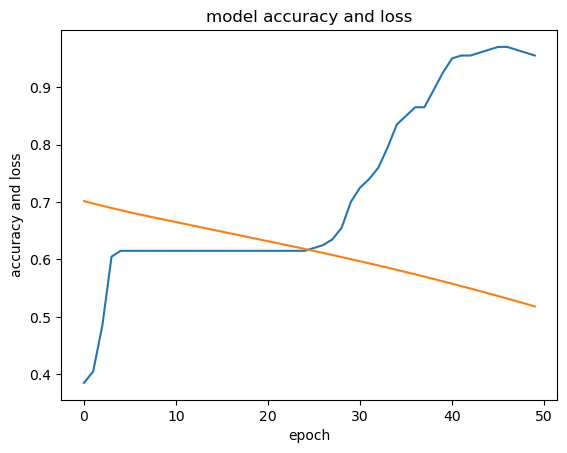

In [81]:
#Visualize the loss and accuracy of the model
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy and loss')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')

In [85]:

pred=model.predict(X_test)
#Show the actual values
print(y_test)
print(pred)

7/7 [==============================] - 0s 1ms/step
132    1
309    0
341    0
196    1
246    1
      ..
217    1
156    1
212    1
376    0
221    1
Name: Class, Length: 200, dtype: int64
[[0.750309  ]
 [0.49035138]
 [0.4911451 ]
 [0.83617884]
 [0.770834  ]
 [0.71255094]
 [0.6421206 ]
 [0.457131  ]
 [0.6502747 ]
 [0.65394497]
 [0.62350786]
 [0.6418172 ]
 [0.5230758 ]
 [0.46542612]
 [0.70690846]
 [0.67620593]
 [0.45317677]
 [0.5598874 ]
 [0.56072795]
 [0.5144599 ]
 [0.78701365]
 [0.53997284]
 [0.54358476]
 [0.46619916]
 [0.57425004]
 [0.4433963 ]
 [0.6401018 ]
 [0.7259985 ]
 [0.44853982]
 [0.47013843]
 [0.73361415]
 [0.44664884]
 [0.48951265]
 [0.82057786]
 [0.52241874]
 [0.84748805]
 [0.6577959 ]
 [0.4907326 ]
 [0.73514843]
 [0.46328738]
 [0.7849711 ]
 [0.54570913]
 [0.559055  ]
 [0.6802384 ]
 [0.46004742]
 [0.64219904]
 [0.46356443]
 [0.48101857]
 [0.77404773]
 [0.5630793 ]
 [0.68804353]
 [0.597847  ]
 [0.4806922 ]
 [0.6629506 ]
 [0.55129856]
 [0.45015284]
 [0.5238976 ]
 [0.863302  ]

In [83]:
print('Original {0}:'.format(", ".join(str(x) for x in y_test)))
print('Predict  {0}:'.format(", ".join(str(x) for x in pred)))

     

Original 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1:
Predict  [0.750309], [0.49035138], [0.4911451], [0.83617884], [0.770834], [0.71255094], [0.6421206], [0.457131], [0.6502747], [0.65394497], [0.62350786], [0.6418172], [0.5230758], [0.46542612], [0.70690846], [0.67620593], [0.45317677], [0.5598874], [0.56072795], [0.5144599], [0.78701365], [0.53997284], [0.54358476], [0.46619916], [0.57425004], [0.4433963], [0.6401018], [0.7259985], [0.448

In [84]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score 
newpred=pred.round()
newpred=abs(newpred)
precision=precision_score(y_test,newpred)
recall=recall_score(y_test,newpred)
f1=f1_score(y_test,newpred)
accuracy=accuracy_score(y_test,newpred)
auc=roc_auc_score(y_test,pred)
gini=2*auc-1
print("gini",gini*100)
print("Precision",precision*100)
print("Recall",recall*100)
print("f1 score",f1*100)
print("roc auc score",auc*100)
print("accuracy",accuracy*100)

gini 95.18929996764105
Precision 95.9349593495935
Recall 92.91338582677166
f1 score 94.4
roc auc score 97.59464998382053
accuracy 93.0
